## Project Introduction:
#### In the health insurance industry, one of the biggest challenges is determining a fair and accurate premium amount for individuals. Charging too little can lead to losses for the company, while charging too much may drive away potential customers. To handle this, insurance companies are increasingly turning to data science to predict insurance costs based on an individual's health and lifestyle attributes.

#### This project aims to build a machine learning model that can predict the medical insurance charges based on features such as:

#### Age

#### Gender

#### Body Mass Index (BMI)

#### Number of children

#### Smoking status

#### Region

#### Charges



### Project Tasks to be Performed:
#### Task 1: Prepare a complete data analysis report on the given dataset.

#### Task 2:

#### o. Clean and prepare the data by identifying and extracting key features

#### o. Train multiple machine learning models and evaluate them to determine the best-performing algorithm

#### Task 3:

 #### o. Create a final ML model to predict the insurance charges for customers

#### o. Use the model to help insurance companies make data-driven decisions about how much to charge customers based on their health risk factors

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Set plot style
sns.set_style("whitegrid")

In [3]:
 # Loading the dataset
df=pd.read_csv('datasets_13720_18513_insurance(1).csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Preview first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Preview last 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Check rows and columns
df.shape

(1338, 7)

In [7]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Summary stats for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Check missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###  Dataset Understanding

The dataset consists of health and demographic data for 1338 individuals, with the goal of predicting the medical insurance charges (`charges`) that a person would be billed based on their attributes.

Below is a detailed explanation of each feature in the dataset:

| Feature     | Type         | Description |
|-------------|--------------|-------------|
| **age**      | Numerical    | Age of the primary beneficiary. Older individuals generally have higher health risks. |
| **sex**      | Categorical  | Gender of the individual (male or female). Gender may have a minor impact on healthcare cost. |
| **bmi**      | Numerical    | Body Mass Index. A higher BMI typically indicates overweight or obesity, which may result in higher medical costs. |
| **children** | Numerical    | Number of dependents covered by the insurance. |
| **smoker**   | Categorical  | Whether the person is a smoker. Smoking significantly increases health risks and insurance charges. |
| **region**   | Categorical  | Residential area in the US (northeast, northwest, southeast, southwest). Some regions may have higher medical costs. |
| **charges**  | Numerical    |  **Target variable** — the amount charged by health insurance. This is what we aim to predict. |

---
`

## EDA

###  Distribution of Numerical Features

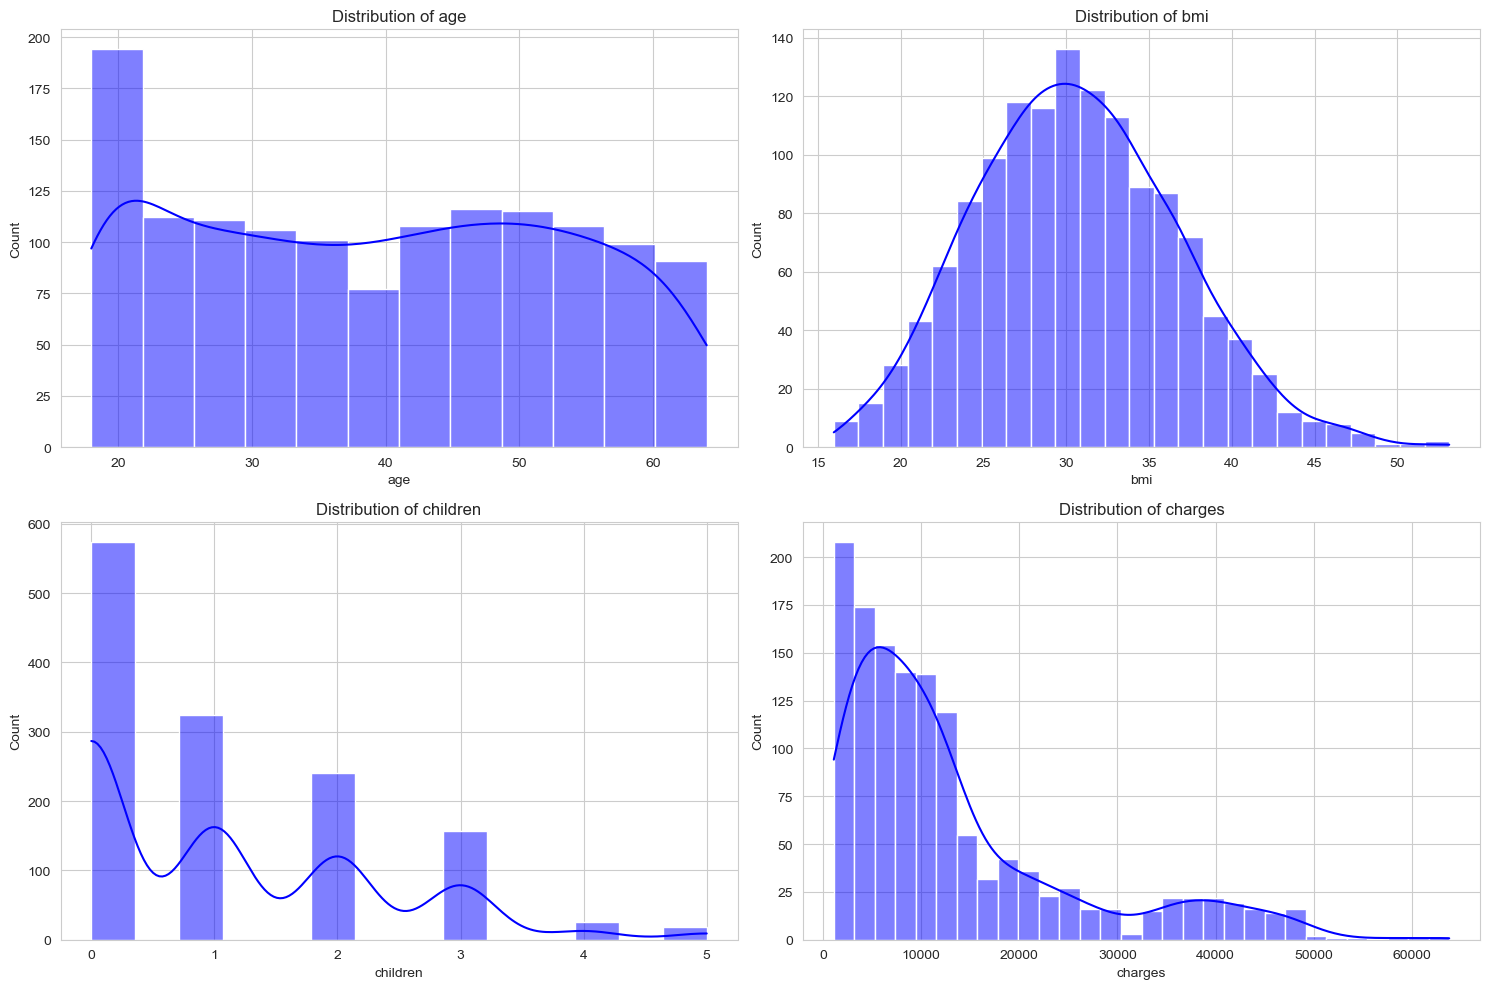

In [13]:
# Histogram for numerical features
num_cols = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


###  Count Plots for Categorical Features

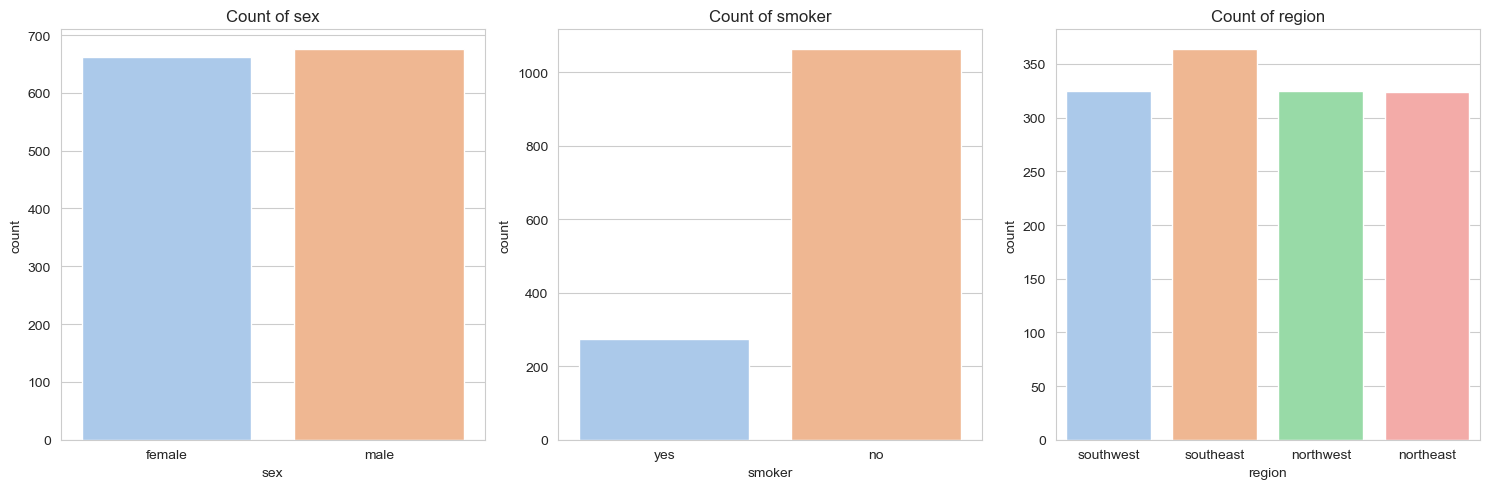

In [15]:
# Count plots for categorical features
cat_cols = ['sex', 'smoker', 'region']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

### Boxplots: Categorical vs Charges

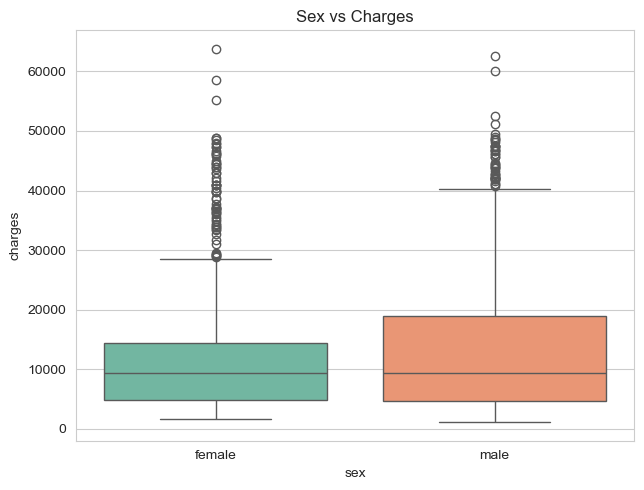

In [17]:
plt.figure(figsize=(18, 5))

# Gender vs Charges
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='sex', y='charges', palette='Set2')
plt.title("Sex vs Charges")
plt.tight_layout()
plt.show()

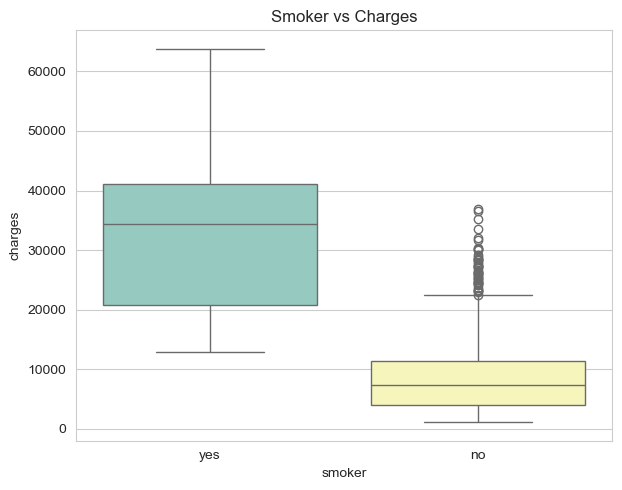

In [18]:
plt.figure(figsize=(18, 5))

# Smoker vs Charges
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='smoker', y='charges', palette='Set3')
plt.title("Smoker vs Charges")
plt.tight_layout()
plt.show()


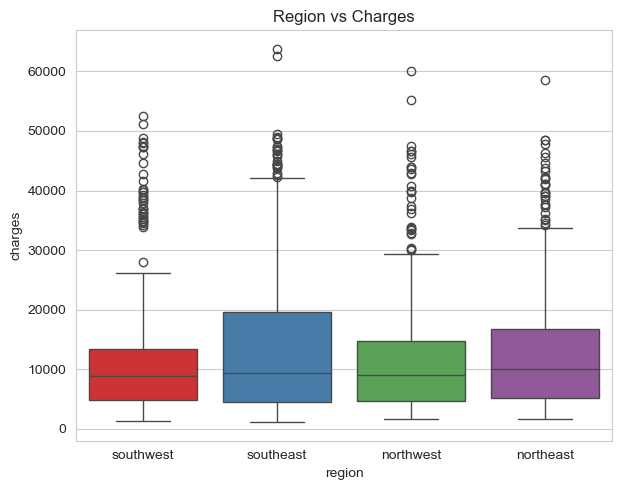

In [19]:
plt.figure(figsize=(18, 5))

# Region vs Charges
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='region', y='charges', palette='Set1')
plt.title("Region vs Charges")

plt.tight_layout()
plt.show()

### Scatter Plots: Numeric Features vs Charges

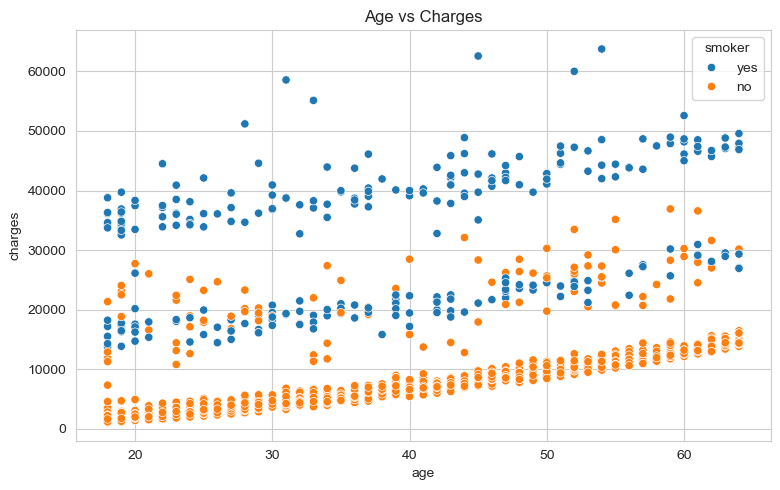

In [21]:
plt.figure(figsize=(15, 5))

# Age vs Charges
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Age vs Charges")

plt.tight_layout()
plt.show()

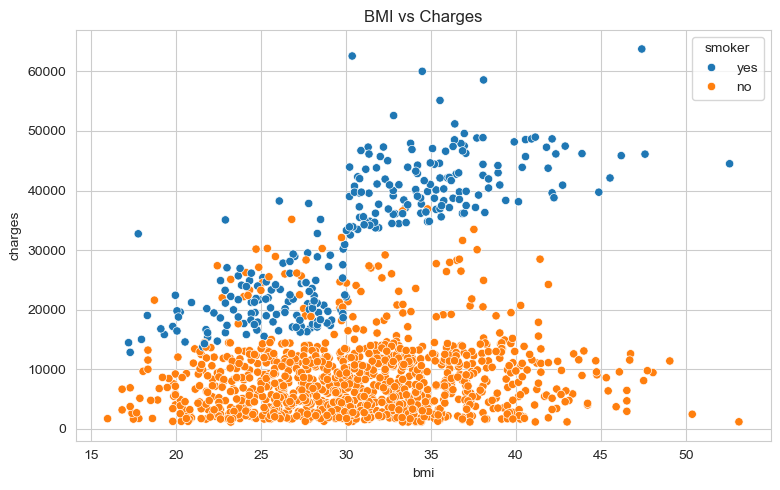

In [22]:
plt.figure(figsize=(15, 5))

# BMI vs Charges
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Charges")

plt.tight_layout()
plt.show()


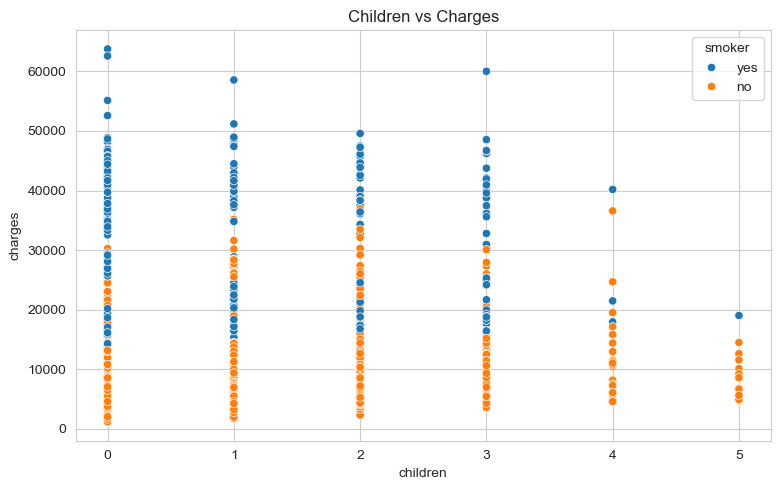

In [23]:
plt.figure(figsize=(15, 5))

# Children vs Charges
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='children', y='charges', hue='smoker')
plt.title("Children vs Charges")

plt.tight_layout()
plt.show()


 ###  Exploratory Data Analysis (EDA)

We visualized the dataset to understand the patterns, distributions, and relationships between input features and the target variable (`charges`).

#### Key Observations:
- **Smoker** status has the biggest impact on charges. Smokers are charged much more than non-smokers.
- **Age** is positively correlated with charges. Older individuals are billed higher.
- **BMI** has more impact when combined with smoking.
- **Gender and Region** have minimal effect on insurance charges.

These insights will help us during model building and feature selection.


### Data Preprocessing

In [26]:
# Step 1: One-Hot Encode Categorical Columns
df_encoded = pd.get_dummies(df,columns=['sex', 'smoker', 'region'], drop_first=True)

# Convert all boolean columns to integers (0/1)
df_encoded = df_encoded.astype(int)

# Check encoded data
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


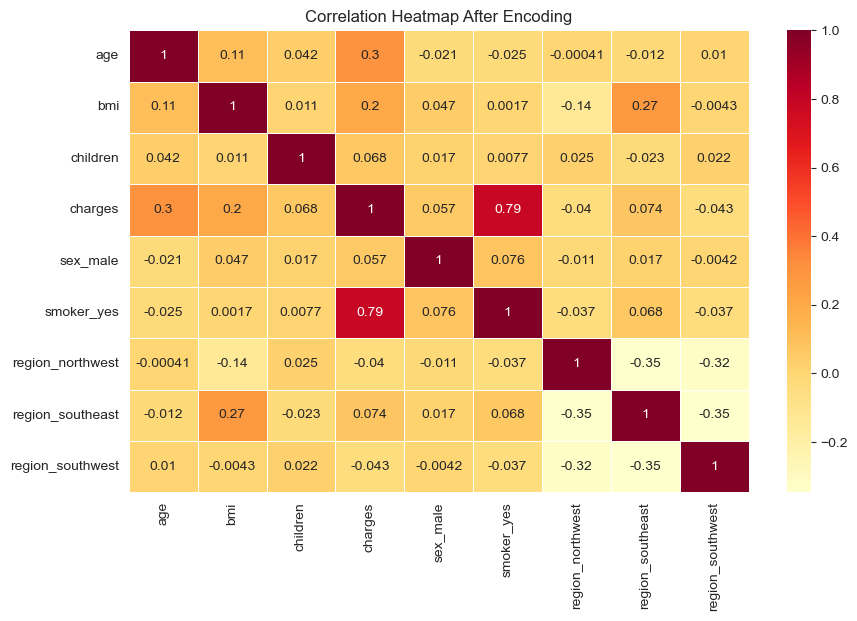

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title("Correlation Heatmap After Encoding")
plt.show()

#### Split and Train Data

In [29]:
# Split into features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [30]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,1,0,0
1334,18,31,0,0,0,0,0,0
1335,18,36,0,0,0,0,1,0
1336,21,25,0,0,0,0,0,1


In [31]:
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: charges, Length: 1338, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1070, 8)
Test shape: (268, 8)


## Modeling

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([ 9087.64215363,  7232.55948323, 36744.39282136,  9390.86060464,
       26835.96961506, 10700.88438873,   176.85511159, 16763.42629132,
        1176.75821394, 11169.05006058, 28141.94818892,  9355.95788892,
        5221.40321606, 38448.8671946 , 40094.17744513, 36935.83914845,
       15154.15405998, 35854.24430695,  9256.40504231, 31345.37256898,
        3720.33899543, 10086.00383365,  2389.24817343,  7018.12055439,
       11443.40843791, 12895.76372111, 14625.6227313 ,  6201.46301286,
        9937.46817478,  2284.12664592,  9180.25612059, 12967.21335176,
        4415.21189286,  3280.78184264,  4616.51137491, 12914.07103691,
        2005.75807266,  8668.775376  , 33415.56094315, 32673.29028852,
        3873.19203608,  4379.17387366, 14024.82770535, 11450.34188499,
        8673.91733215, 12093.78520875,  5238.19686234,  3218.05521838,
       35328.14327403,  9166.62577563, 15884.51962992,  2376.08281379,
       12380.50385494,  1609.23655956, 13396.31680531, 12705.29630435,
      

In [36]:
# Compare actual and predicted charges
comparison = pd.DataFrame({'Actual Charges': y_test.values, 'Predicted Charges': y_pred_lr})
comparison.head(10) 

,Actual Charges,Predicted Charges
0,9095,9087.642154
1,5272,7232.559483
2,29330,36744.392821
3,9301,9390.860605
4,33750,26835.969615
5,4536,10700.884389
6,2117,176.855112
7,14210,16763.426291
8,3732,1176.758214
9,10264,11169.050061


In [37]:
y_train

560      9193
1285     8534
1142    27117
969      8596
486     12475
        ...  
1095     4561
1130     8582
1294    11931
860     46113
1126    10214
Name: charges, Length: 1070, dtype: int32

In [38]:
train_comparison = pd.DataFrame({
    'Actual Charges (Train)': y_train.values,
    'Predicted Charges (Train)': y_train
})

train_comparison.head(10)

,Actual Charges (Train),Predicted Charges (Train)
560,9193,9193
1285,8534,8534
1142,27117,27117
969,8596,8596
486,12475,12475
170,13405,13405
277,2150,2150
1033,13747,13747
209,6610,6610
947,39047,39047


In [39]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Performance:
MAE : 4176.27
MSE : 33566439.74
RMSE: 5793.66
R² Score: 0.7838


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([ 8604.        ,  5266.        , 28950.        ,  9500.        ,
       33732.        , 11326.        ,  2527.        , 14692.        ,
       23288.        , 10269.        , 19199.        ,  6986.        ,
        4040.        , 46200.        , 45008.        , 48885.        ,
        9304.        , 42211.        ,  8232.        , 21348.        ,
        3906.        ,  6849.        ,  1253.        ,  2741.        ,
       10702.        , 10338.        , 12638.        ,  4661.        ,
        9225.        ,  8583.33333333,  7512.        , 11840.        ,
        2026.        ,  4827.        ,  3410.        ,  7731.        ,
        2007.        ,  8219.        , 24873.        , 39774.        ,
        4561.        ,  2639.        , 11763.        , 12142.        ,
        4949.        , 12913.        , 26018.        ,  3906.        ,
       42760.        ,  5124.        , 13887.        , 11272.        ,
        6610.        ,  1708.        , 11090.        , 10848.        ,
      

In [42]:
dt_comparison = pd.DataFrame({
    'Actual Charges': y_test.values,
    'Predicted Charges (Decision Tree)': y_pred_dt
})

dt_comparison.head(10)


,Actual Charges,Predicted Charges (Decision Tree)
0,9095,8604.0
1,5272,5266.0
2,29330,28950.0
3,9301,9500.0
4,33750,33732.0
5,4536,11326.0
6,2117,2527.0
7,14210,14692.0
8,3732,23288.0
9,10264,10269.0


In [43]:
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(" Decision Tree Regressor Performance:")
print(f"MAE  : {mae_dt:.2f}")
print(f"MSE  : {mse_dt:.2f}")
print(f"RMSE : {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.4f}")


 Decision Tree Regressor Performance:
MAE  : 2968.20
MSE  : 38728844.54
RMSE : 6223.25
R² Score: 0.7505


#### Hyperparameter Tunning for Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Create tuned model
dt_tuned = DecisionTreeRegressor(
    max_depth=5, 
    min_samples_split=10, 
    min_samples_leaf=5,
    random_state=42
)

# Train
dt_tuned.fit(X_train, y_train)

# Predict
y_pred_dt_tuned = dt_tuned.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_dt_tuned)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned))
r2 = r2_score(y_test, y_pred_dt_tuned)

print(" Tuned Decision Tree Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


 Tuned Decision Tree Performance:
MAE  : 2696.95
RMSE : 4534.80
R²   : 0.8675


### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf


array([ 9673.27      ,  5284.31      , 28300.        , 12149.68      ,
       34372.21666667,  8164.61      ,  2106.5       , 14931.63      ,
        6555.73      , 10779.5       , 18299.11      ,  7159.94      ,
        4660.93      , 46305.22      , 48029.05      , 44960.1       ,
        9852.02      , 42657.42      ,  9592.74      , 24995.31      ,
        8693.56      , 10102.21      ,  1794.03833333,  3690.84333333,
       11750.18      , 11618.825     , 13200.25      ,  6775.21      ,
       10330.6       ,  3838.5255    ,  8017.9       , 11717.644     ,
        4359.51333333,  5695.91      ,  4242.49      , 10368.07      ,
        2598.99      , 10662.084     , 23724.58      , 39958.32      ,
        5096.84      ,  3264.84      , 11990.0375    , 17293.81      ,
        6293.52      , 15424.06      , 17155.32      ,  8522.78      ,
       42369.23      ,  8330.85      , 14218.75      ,  4077.1475    ,
        6974.69      ,  1800.12916667, 13891.44416667, 10675.8       ,
      

In [48]:
rf_comparison = pd.DataFrame({
    'Actual Charges': y_test.values,
    'Predicted Charges (RF)': y_pred_rf
})

rf_comparison.head(10)


,Actual Charges,Predicted Charges (RF)
0,9095,9673.270000
1,5272,5284.310000
2,29330,28300.000000
3,9301,12149.680000
4,33750,34372.216667
5,4536,8164.610000
6,2117,2106.500000
7,14210,14931.630000
8,3732,6555.730000
9,10264,10779.500000


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.4f}")


Random Forest Regressor Performance:
MAE  : 2719.52
RMSE : 4709.47
R²   : 0.8571


### XG Boost

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([ 9556.334  ,  4260.188  , 29224.29   ,  9445.175  , 33052.18   ,
        8975.266  ,  1068.2378 , 14423.794  ,  5226.862  , 11544.152  ,
       18993.17   ,  7368.579  ,  5960.3613 , 44531.58   , 47122.387  ,
       43812.28   ,  9287.189  , 40925.86   ,  9015.333  , 23474.248  ,
        2356.0427 ,  8763.984  ,   387.38327,  4603.6323 ,  9573.249  ,
       11595.384  , 15610.44   ,  8964.414  , 10962.558  ,  1329.0952 ,
        7157.73   , 11754.016  ,  4102.0083 ,  2542.2961 ,  1611.9606 ,
       11497.62   ,  1474.495  , 10253.99   , 22025.21   , 39886.434  ,
        6741.547  ,  1595.6101 , 10262.458  , 17740.018  ,  8998.262  ,
       13132.901  , 20037.867  , 15626.537  , 41863.777  , 13029.775  ,
       13856.307  ,  2204.5513 ,  5184.764  ,  2002.2244 ,  9925.793  ,
       11446.272  ,  1276.2833 , 48435.766  , 12335.679  , 14430.787  ,
       12913.715  ,  3547.9968 , 18162.871  ,  6813.2397 , 11399.625  ,
        7230.994  , 21332.863  , 15277.776  ,  6727.29   ,  2695

In [53]:
rf_comparison = pd.DataFrame({
    'Actual Charges': y_test.values,
    'Predicted Charges (XGBoost)': y_pred_xgb
})

rf_comparison.head(10)


,Actual Charges,Predicted Charges (XGBoost)
0,9095,9556.333984
1,5272,4260.187988
2,29330,29224.289062
3,9301,9445.174805
4,33750,33052.179688
5,4536,8975.265625
6,2117,1068.237793
7,14210,14423.793945
8,3732,5226.861816
9,10264,11544.152344


In [54]:
# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(" XGBoost Regressor Performance:")
print(f"MAE  : {mae_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R²   : {r2_xgb:.4f}")


 XGBoost Regressor Performance:
MAE  : 3087.25
RMSE : 5161.78
R²   : 0.8284


#### Hyperparameter Tunning for XGBoost

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_best_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2 = r2_score(y_test, y_pred_best_xgb)

print("Tuned XGBoost Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Tuned XGBoost Performance:
MAE  : 2490.23
RMSE : 4377.10
R²   : 0.8766


### Finally comparison 

In [58]:
import pandas as pd

# Create a comparison dictionary
comparison_data = {
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Tuned Decision Tree',
        'Random Forest',
        'XGBoost',
        'Tuned XGBoost'
    ],
    'MAE': [
        4176.27,
        2968.20,
        2696.95,
        2719.52,
        3087.25,
        2490.23
    ],
    'RMSE': [
        5793.66,
        6223.25,
        4534.80,
        4709.47,
        5161.78,
        4377.10
    ],
    'R2 Score': [
        0.7838,
        0.7505,
        0.8675,
        0.8571,
        0.8284,
        0.8766
    ],
    'Tuned': [
        'No',
        'Manual',
        'Yes',
        'Yes',
        'Yes',
        'Yes'
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Sort by R2 Score 
comparison_df = comparison_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

# Display the table
print(" Final Model Comparison:\n")
print(comparison_df)

 Final Model Comparison:

                 Model      MAE     RMSE  R2 Score   Tuned
0        Tuned XGBoost  2490.23  4377.10    0.8766     Yes
1  Tuned Decision Tree  2696.95  4534.80    0.8675     Yes
2        Random Forest  2719.52  4709.47    0.8571     Yes
3              XGBoost  3087.25  5161.78    0.8284     Yes
4    Linear Regression  4176.27  5793.66    0.7838      No
5        Decision Tree  2968.20  6223.25    0.7505  Manual


####  The Tuned XGBoost is better performance as compare other algorithms

###  Project Conclusion
The aim of this project was to build a predictive model to estimate insurance charges for individuals based on factors such as age, BMI, smoking habits, gender, region, and number of children. After performing exploratory data analysis, encoding categorical variables, splitting the dataset, and applying multiple regression models, the results were evaluated using MAE, RMSE, and R² score.

Multiple algorithms were tested, including:

Linear Regression

Decision Tree Regressor

Random Forest Regressor

XGBoost Regressor

Each model was evaluated and fine-tuned using hyperparameter tuning techniques like GridSearchCV. The Tuned XGBoost Regressor outperformed all other models and achieved the best results:

MAE: 2490.23

RMSE: 4377.10

R² Score: 0.8766

### This indicates that the Tuned XGBoost model explains approximately 87.66% of the variance in insurance charges and makes accurate predictions with minimal error. Therefore, it was selected as the final model for this problem.

